# Final Project

In [34]:
# Topic: Analysing UFO Sightings Around the World.

# Contributors: Riya Kukadia (117260557) and Amartya Patel (117183986)

# Introduction

In [128]:
# First and foremost, we simply import necessary libraries and tools, that we might/will need for the completeion of this
# project.

import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import sys
import io

In [129]:
df = pd.read_csv('water_potability.csv', low_memory=False)

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [131]:
df.shape

(3276, 10)

Let's get a better understanding of what exactly is missing

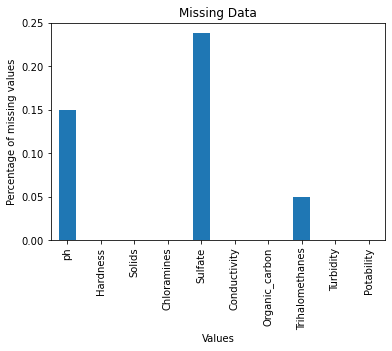

In [132]:
df.isnull().mean().plot.bar() 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Values') 
plt.title('Missing Data');

So we can see that we have a lot of missing values in the sulphate, ph and trihalomethane columns. 

Our options are- 

1. filling them in with the mean of the column 

2. padding them in with 0s

However, since these values will help us decide if the water is potable or not, 0s might skew the results too much. Filling in nans with the mean/median may also cause inaccuracies, so for the purpose of our project, we drop nans


In [133]:
df = df.dropna()
df.shape

(2011, 10)

/Users/riyakukadia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

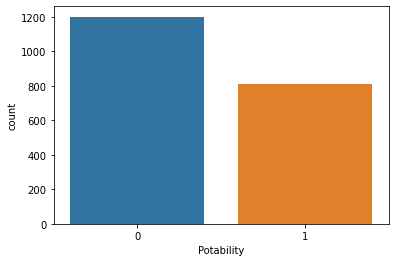

In [134]:
#Countplot for the 'Potability' column

sns.countplot(df['Potability'])

In [135]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


# Step 2: EDA

Lets visualize which values are different for potable vs non potable water using box plots

<AxesSubplot:xlabel='Potability', ylabel='Solids'>

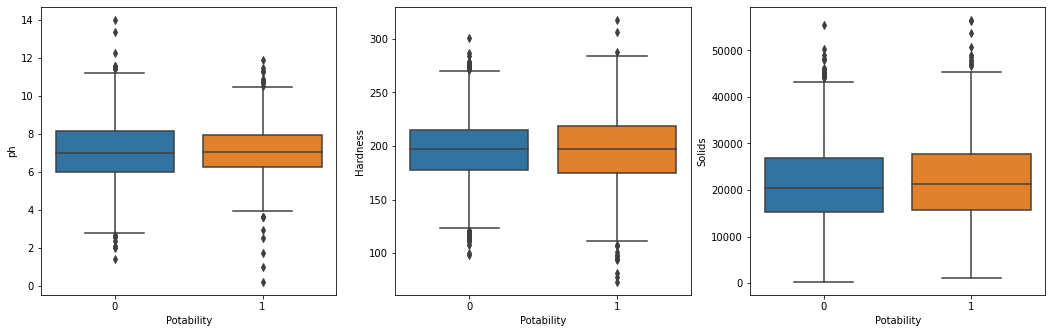

In [136]:
plt.figure(figsize = (18,18))
plt.subplot(3,3, 1)
sns.boxplot(x='Potability', y='ph', data=df)

plt.subplot(3,3, 2)
sns.boxplot(x='Potability', y='Hardness', data=df)

plt.subplot(3,3, 3)
sns.boxplot(x='Potability', y='Solids', data=df)

<AxesSubplot:xlabel='Potability', ylabel='Conductivity'>

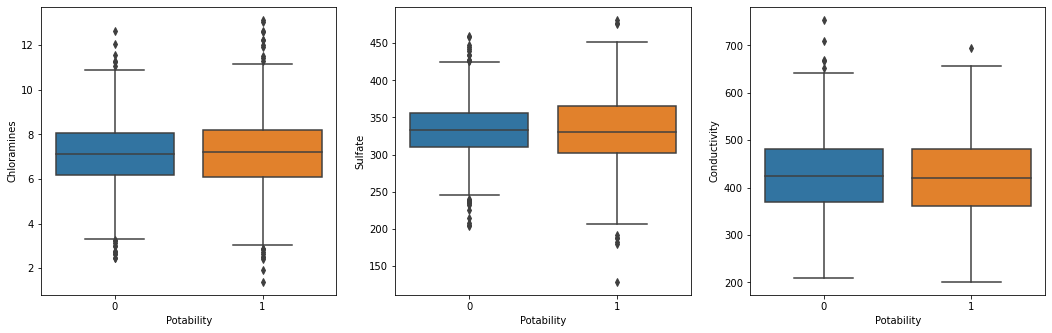

In [137]:
plt.figure(figsize = (18,18))
plt.subplot(3,3, 1)
sns.boxplot(x='Potability', y='Chloramines', data=df)

plt.subplot(3,3, 2)
sns.boxplot(x='Potability', y='Sulfate', data=df)

plt.subplot(3,3, 3)
sns.boxplot(x='Potability', y='Conductivity', data=df)

<AxesSubplot:xlabel='Potability', ylabel='Turbidity'>

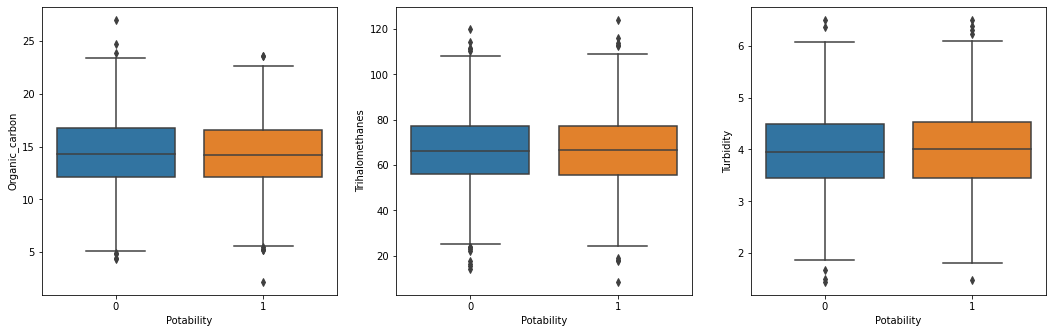

In [138]:
plt.figure(figsize = (18,18))
plt.subplot(3,3, 1)
sns.boxplot(x='Potability', y='Organic_carbon', data=df)

plt.subplot(3,3, 2)
sns.boxplot(x='Potability', y='Trihalomethanes', data=df)

plt.subplot(3,3, 3)
sns.boxplot(x='Potability', y='Turbidity', data=df)

So, we can see that there are slight differences between the ph, sulfate, hardness and chloramine values of potable vs. non potable water, but no clear correlations
Let's use a heatmap to determine any correlations better


<AxesSubplot:>

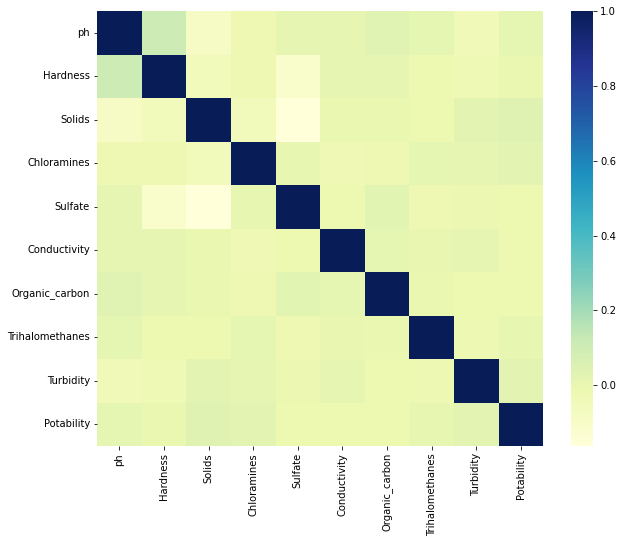

In [159]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="YlGnBu")

From the heatplot too we can see that there are no strong relationships between variables

In [140]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


# Hypothesis Testing:

All variables in the data are strongly correlated to the potability of water, i.e. all variables have a strong impact on determining whether water is potable or not

In [168]:
p_values = {}
for feature in df.columns:
    corr, p_value = scipy.stats.spearmanr(df[feature], df['Potability'])
    p_values[feature] = p_value 
p_values

{'ph': 0.5297797418282144,
 'Hardness': 0.6998145997007005,
 'Solids': 0.11633127125962607,
 'Chloramines': 0.3314569572193391,
 'Sulfate': 0.6867588303366772,
 'Conductivity': 0.42376258895464713,
 'Organic_carbon': 0.5298310038190563,
 'Trihalomethanes': 0.8685422511859388,
 'Turbidity': 0.31448141304021615,
 'Potability': 0.0}

From https://www.simplilearn.com/tutorials/statistics-tutorial/spearmans-rank-correlation - 

Spearman’s rank correlation measures the strength and direction of association between two ranked variables. It basically gives the measure of monotonicity of the relation between two variables i.e. how well the relationship between two variables could be represented using a monotonic function.

The spearman test gives a high p-value for Hardness, Sulfates, Trihalomethanes indicating a somewhat strong corelation between them and Potability


So even though some variables are corelated to potability, not all variables are, so we can reject the null hypothesis that all variables have a strong impact on the potability of water. 

# Step 4: ML 

In [171]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

We need to determine what features will be the best to use for our classifiers

In [172]:
# using hold out validation and holding out 25% of the training set for testing so training on 75%

In [183]:
X = df[['ph', 'Hardness', 'Sulfate']] # dropping potability columns since that's what we want our model to predict
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [184]:
# decision trees
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6640159045725647

/Users/riyakukadia/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


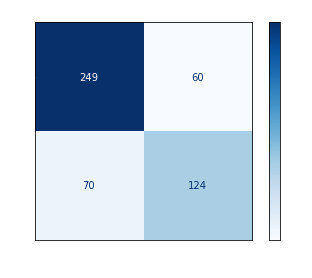

In [185]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)

In [186]:
# KNN 
knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.5725646123260437

/Users/riyakukadia/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


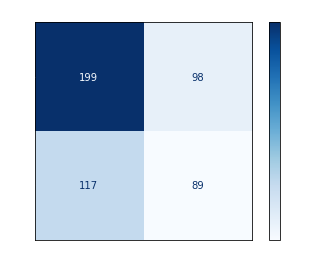

In [187]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)